In [1]:
#requirments are not done by order
#(i.e.:last requirment that is related to Titles is done through the notebook not by orders)

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
titanic =pd.read_csv("C:\\Users\\Yousef Hanna\\Desktop\\github_gomycode\\titanic-passengers.csv",sep = ";")

In [4]:
titanic["Name"]


0                             Collander, Mr. Erik Gustaf
1                                Moen, Mr. Sigurd Hansen
2                                 Jensen, Mr. Hans Peder
3            Palsson, Mrs. Nils (Alma Cornelia Berglund)
4                                 Davidson, Mr. Thornton
                             ...                        
886                  Nasser, Mrs. Nicholas (Adele Achem)
887                                Sirayanian, Mr. Orsen
888                                  Cacic, Miss. Marija
889                     Petroff, Mr. Pastcho ("Pentcho")
890    Phillips, Miss. Kate Florence ("Mrs Kate Louis...
Name: Name, Length: 891, dtype: object

In [5]:
titles = {"Capt":"Officer",
                    "Col":"Officer",
                    "Major":"Officer",
                    "Dr":"Officer",
                    "Rev":"Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Lady" :      "Royalty",
                    "the Countess": "Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Miss",
                    "Mlle":       "Miss",
                    "Miss" :      "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mrs",
                    "Mrs" :       "Mrs",
                    "Master" :    "Master"
                    }
# Functions that returns the title from a name. All the name in the dataset has the format "Surname, Title. Name"
def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'
# A list with the all the different titles
titles = sorted(set([x for x in titanic.Name.map(lambda x: get_title(x))]))
# Normalize the titles, returning 'Mr', 'Master', 'Miss' or 'Mrs'
def replace_titles(x):
    title = x['Title']
    if title in ["Capt","Col","Major","Dr","Rev"]:
        return 'Officer'
    elif title in ["Jonkheer", "Don","Sir","Lady","the Countess","Dona"]:
        return 'Royalty'
    elif title in ['Mlle',"Mme", "Miss"]:
        return 'Miss'
    elif title in ['Mlle',"Mme", "Miss"]:
        return 'Miss'
    elif title in ["Mrs","Mr", "Ms"]:
        return 'Mrs'
    elif title =="Master" :
        return "Master"
    else:
        return title

# Lets create a new column for the titles
titanic['Title'] = titanic['Name'].map(lambda x: get_title(x))
# train.Title.value_counts()
# train.Title.value_counts().plot(kind='bar')

# And replace the titles, so the are normalized to 'Mr', 'Miss' and 'Mrs'
titanic['Title'] = titanic.apply(replace_titles, axis=1)
titanic
#this part was partially done using "https://www.kaggle.com/manuelatadvice/feature-engineering-titles"

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S,Mrs
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,Mrs
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S,Mrs
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S,Mrs
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C,Mrs
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S,Miss
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S,Mrs


In [6]:
titanic.Title.unique()

array(['Mrs', 'Miss', 'Officer', 'Royalty', 'Master'], dtype=object)

In [7]:
titanic = titanic.drop(["PassengerId","Name","Ticket","Cabin"], axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,No,2,male,28.0,0,0,13.0000,S,Mrs
1,No,3,male,25.0,0,0,7.6500,S,Mrs
2,No,3,male,20.0,0,0,7.8542,S,Mrs
3,No,3,female,29.0,0,4,21.0750,S,Mrs
4,No,1,male,31.0,1,0,52.0000,S,Mrs


In [8]:
print(titanic.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
dtype: int64


In [9]:
titanic['Age'].fillna(titanic['Age'].mode()[0],inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0],inplace=True)

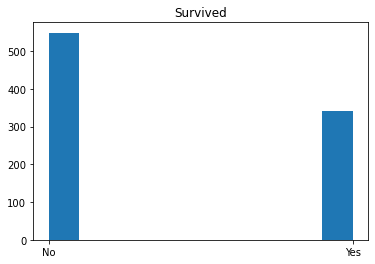

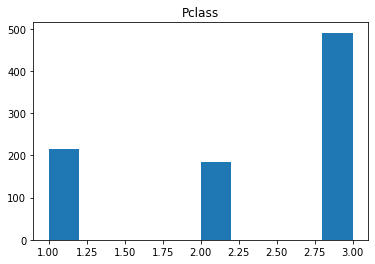

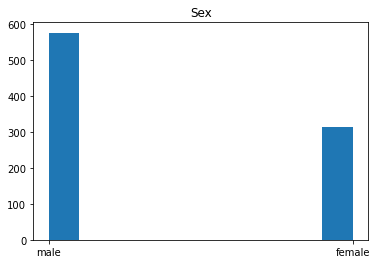

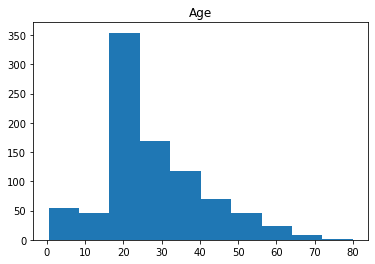

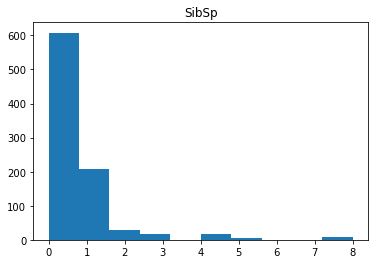

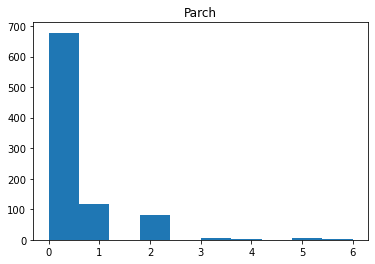

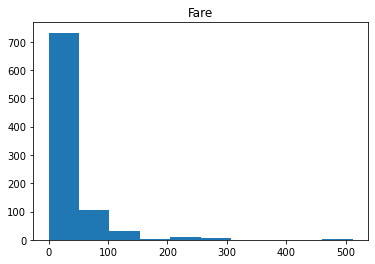

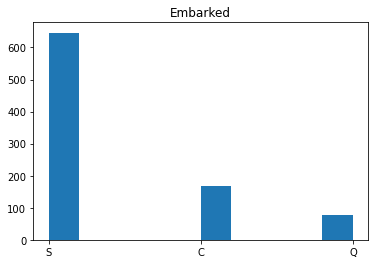

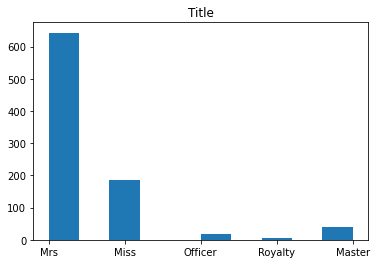

In [10]:
for i in titanic:
    plt.hist(titanic[i])
    plt.title(i)
    plt.show()

<AxesSubplot:xlabel='Sex', ylabel='Age'>

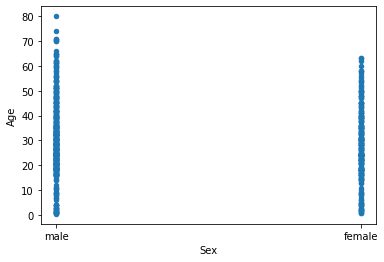

In [11]:
titanic.plot.scatter(x="Sex",y='Age')

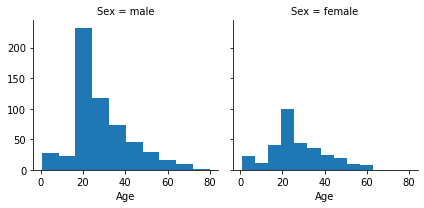

In [12]:
titanicAS = sns.FacetGrid(titanic, col = 'Sex')
titanicAS.map(plt.hist,"Age",bins=10)

C:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


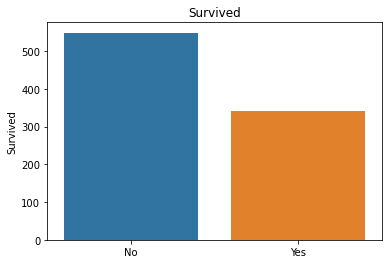

C:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


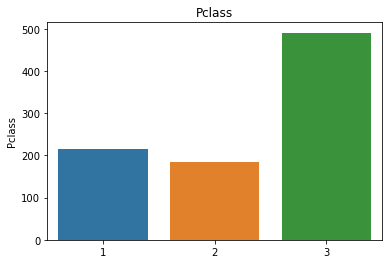

C:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


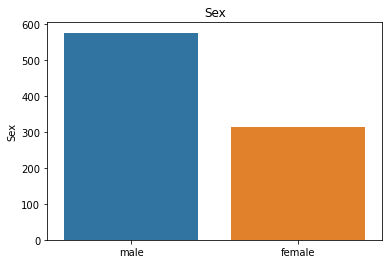

C:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


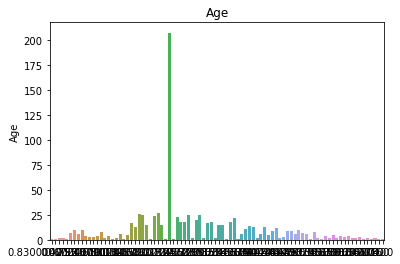

C:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


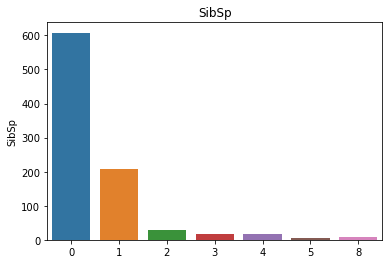

C:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


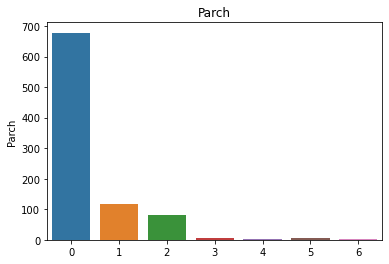

C:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


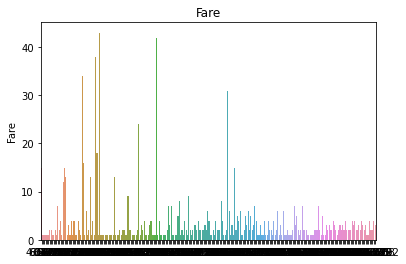

C:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


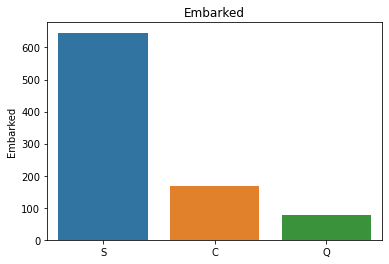

C:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


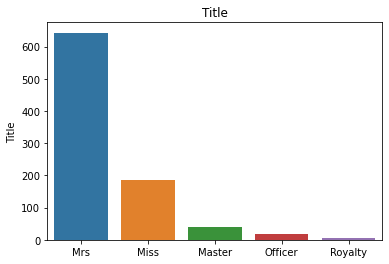

In [13]:
for i in titanic.columns:
    sns.barplot(titanic[i].value_counts().index,titanic[i].value_counts()).set_title(i)
    plt.show()

In [14]:
t_encode = LabelEncoder()
titanic['Survived']= t_encode.fit_transform(titanic['Survived'])
titanic['Sex']= t_encode.fit_transform(titanic['Sex'])
titanic['Embarked']= t_encode.fit_transform(titanic['Embarked'])
titanic['Title']= t_encode.fit_transform(titanic['Title'])
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,2,1,28.0,0,0,13.0000,2,2
1,0,3,1,25.0,0,0,7.6500,2,2
2,0,3,1,20.0,0,0,7.8542,2,2
3,0,3,0,29.0,0,4,21.0750,2,2
4,0,1,1,31.0,1,0,52.0000,2,2
...,...,...,...,...,...,...,...,...,...
886,1,2,0,14.0,1,0,30.0708,0,2
887,0,3,1,22.0,0,0,7.2292,0,2
888,0,3,0,30.0,0,0,8.6625,2,1
889,0,3,1,24.0,0,0,7.8958,2,2


          Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived  1.000000 -0.338481 -0.543351 -0.052872 -0.035322  0.081629   
Pclass   -0.338481  1.000000  0.131900 -0.356187  0.083081  0.018443   
Sex      -0.543351  0.131900  1.000000  0.073377 -0.114631 -0.245489   
Age      -0.052872 -0.356187  0.073377  1.000000 -0.232411 -0.155118   
SibSp    -0.035322  0.083081 -0.114631 -0.232411  1.000000  0.414838   
Parch     0.081629  0.018443 -0.245489 -0.155118  0.414838  1.000000   
Fare      0.257307 -0.549500 -0.182333  0.107554  0.159651  0.216225   
Embarked -0.167675  0.162098  0.108262 -0.000020  0.068230  0.039798   
Title    -0.285103 -0.111737  0.378240  0.478161 -0.305963 -0.273313   

              Fare  Embarked     Title  
Survived  0.257307 -0.167675 -0.285103  
Pclass   -0.549500  0.162098 -0.111737  
Sex      -0.182333  0.108262  0.378240  
Age       0.107554 -0.000020  0.478161  
SibSp     0.159651  0.068230 -0.305963  
Parch     0.216225  0.039798 -0.2

<AxesSubplot:>

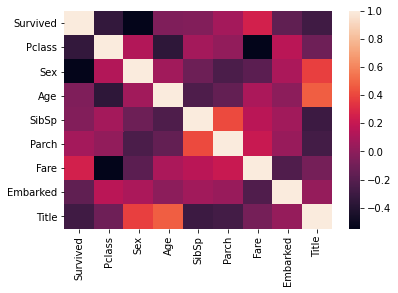

In [15]:
print(titanic.corr())
sns.heatmap(titanic.corr())

          Survived       Age       Sex
Survived  1.000000 -0.052872 -0.543351
Age      -0.052872  1.000000  0.073377
Sex      -0.543351  0.073377  1.000000


<AxesSubplot:>

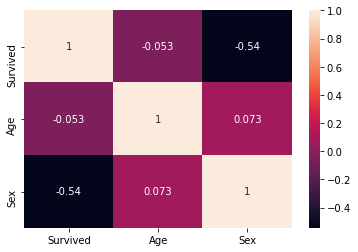

In [16]:
print(titanic[["Survived","Age","Sex"]].corr())
sns.heatmap(titanic[["Survived","Age","Sex"]].corr(), annot= True)

In [17]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

creating a function (def) called (plot_correlation_map) that takes one input (df)
function is excuted as the following:
   >- Creating a variable called (corr) that gets the correlation of the input data frame. 
   >-Setting the figsize(dimension) for the plot usinf matplotlib.
   >-Setting the color and figure of plot using seaborn(as_cmapbool, optional, If True, return a matplotlib.colors.Colormap.)
        https://seaborn.pydata.org/generated/seaborn.diverging_palette.html
   >-Creating the heatmap using seaborn, given the input data (corr), then colors from the stated variable (cmap), setting the plot into equal dimension(square), adding color bar (cbar_kws), Axes object with the heatmap (ax), write the data value in each cell(annot),  specifing font size of the annotation with 12 (annot_kws).

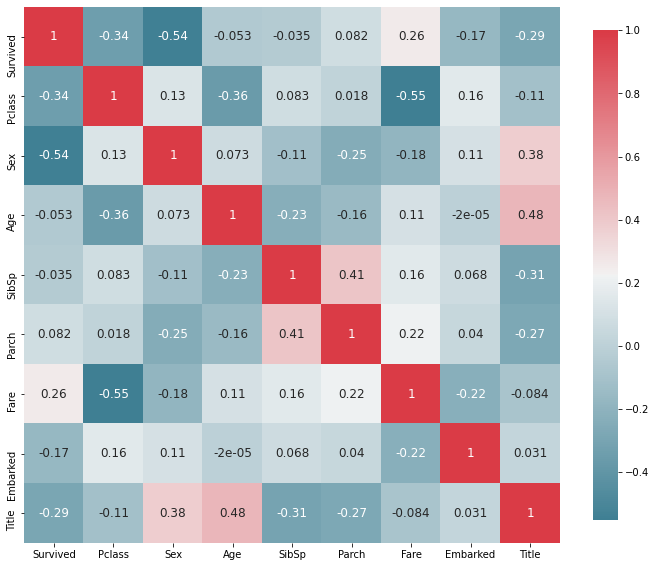

In [18]:
plot_correlation_map(titanic)

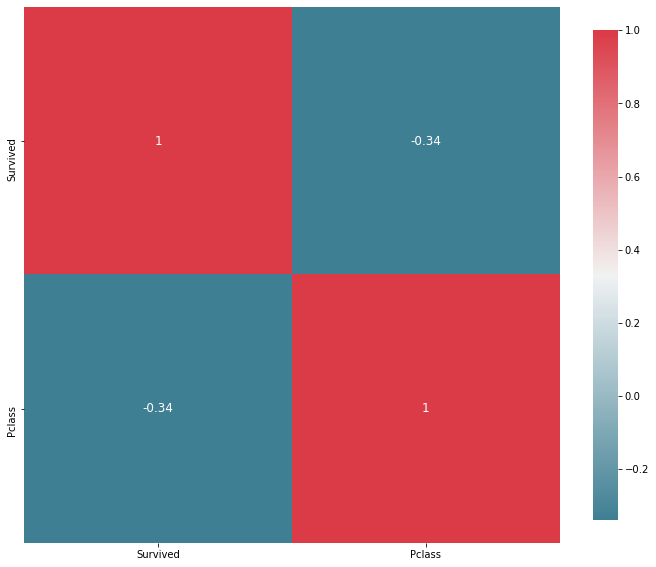

In [19]:
titanic_df = pd.DataFrame(titanic)
titanic_df = titanic_df[["Survived","Pclass"]]
plot_correlation_map(titanic_df)

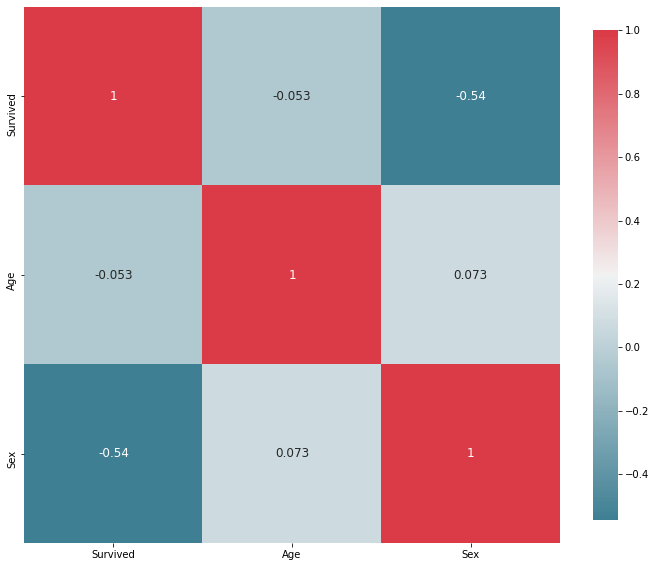

In [20]:
titanic_df = pd.DataFrame(titanic)
titanic_df = titanic_df[["Survived","Age","Sex"]]
plot_correlation_map(titanic_df)

In [21]:
titanic[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean()
#63% of pclass 1 survived?!
#47% of pclass 2 survived?!
#24% of pclass 3 survived?!

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


          Survived     Title      Fare
Survived  1.000000 -0.285103  0.257307
Title    -0.285103  1.000000 -0.084377
Fare      0.257307 -0.084377  1.000000


<AxesSubplot:>

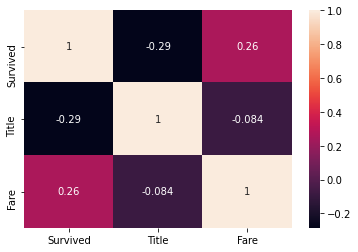

In [22]:
print(titanic[["Survived","Title","Fare"]].corr())
sns.heatmap(titanic[["Survived","Title","Fare"]].corr(), annot= True)

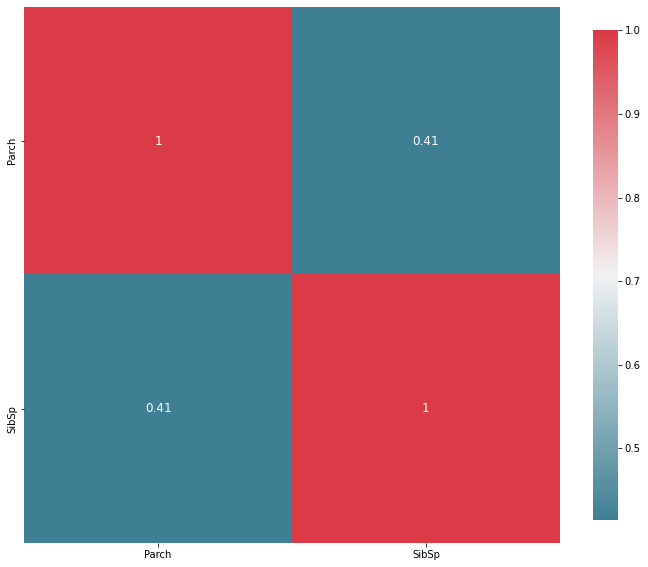

In [23]:
FamilySize = pd.DataFrame(titanic)
FamilySize = FamilySize[["Parch","SibSp"]]
plot_correlation_map(FamilySize)

In [24]:
titanic[["Parch", "SibSp"]].groupby(["Parch"], as_index=True).mean()

,SibSp
Parch,
0,0.237463
1,1.084746
2,2.062500
3,1.000000
4,0.750000
5,0.600000
6,1.000000


In [25]:
pd.pivot_table(titanic, index= "Survived", values = ["Age","Parch","SibSp", "Fare"])

,Age,Fare,Parch,SibSp
Survived,,,,
0,29.117486,22.117887,0.329690,0.553734
1,27.683246,48.395408,0.464912,0.473684
